In [1]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
# from tensorflow.keras import layers
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from keras.datasets import mnist
from keras.utils import to_categorical
# from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

In [2]:
# import sys
# !{sys.executable} -m pip uninstall tensorflow keras -y

In [3]:
# !{sys.executable} -m pip install --no-cache-dir tensorflow==2.20.0 keras

In [4]:
# import sys
# !{sys.executable} -m pip install scikeras

In [5]:
#digit MNist dataset import
(X_train_digit, y_train_digit),(X_test_digit,y_test_digit)=mnist.load_data()

In [6]:
X_train_digit

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
y_train_digit

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

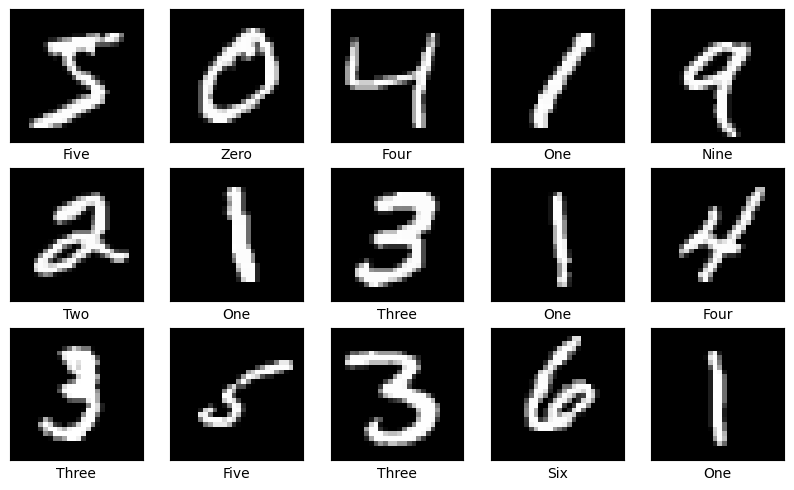

In [8]:
#Name of number digits in order
col_names=['Zero','One','Two','Three','Four','Five','Six','Seven','Eight','Nine']
#Visuvalising the digits
plt.figure(figsize=(10,10))
for i in range(15):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train_digit[i],cmap='gray')
    plt.xlabel(col_names[y_train_digit[i]])
plt.show()

In [9]:
X_train_digit.shape

(60000, 28, 28)

In [10]:
X_test_digit.shape

(10000, 28, 28)

In [11]:
X_train_digit=X_train_digit.reshape(60000,784)
X_test_digit=X_test_digit.reshape(10000,784)

In [12]:
X_test_digit

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
X_train_digit

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [14]:
X_test_digit.shape

(10000, 784)

In [15]:
#Encoding Digit mnist labels
y_train_digit=to_categorical(y_train_digit,num_classes=10)
y_test_digit=to_categorical(y_test_digit,num_classes=10)


In [16]:
y_train_digit[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [17]:
#Creating base neural network
model=keras.Sequential([
    layers.Dense(256,activation='relu',input_shape=(784,)),
    #layers.dropout(0.3)
    #layers.Batchnormalization(),
    layers.Dense(64,activation='relu'),
    #layers.dropout(0.3)
    #layers.Batchnormalization(),
    layers.Dense(64,activation='relu'),
    #layers.dropout(0.3)
    #layers.Batchnormalization(),
    layers.Dense(10,activation='sigmoid')  
])

C:\Users\Windows\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
#param_number=output_channel_number *(input_channel_number + 1)
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,218 (868.04 KB)

 Trainable params: 222,218 (868.04 KB)

 Non-trainable params: 0 (0.00 B)

In [19]:
# compiling the model
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [20]:
history=model.fit(X_train_digit,y_train_digit,batch_size=100,epochs=10,validation_data=(X_test_digit,y_test_digit))

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.7771 - loss: 1.6773 - val_accuracy: 0.9084 - val_loss: 0.3336
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.9140 - loss: 0.2556 - val_accuracy: 0.9274 - val_loss: 0.2240
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9388 - loss: 0.1653 - val_accuracy: 0.9267 - val_loss: 0.2207
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9425 - loss: 0.1343 - val_accuracy: 0.9337 - val_loss: 0.2043
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 21ms/step - accuracy: 0.9457 - loss: 0.1129 - val_accuracy: 0.9297 - val_loss: 0.1772
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 13s 21ms/step - accuracy: 0.9454 - loss: 0.0978 - val_accuracy: 0.9397 - val_loss: 0.1665
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 21s 22ms/step - accuracy: 0.9462 - loss: 0.0915 - val_accuracy: 0.9319 - val_loss: 0.1788
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9407 - loss: 0.0836 - 

In [21]:
#prediction of Lable_digites
y_predict=model.predict(X_train_digit)

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step


In [22]:
y_predict[0]

array([1.53787190e-03, 9.99936938e-01, 1.52988825e-02, 9.99997616e-01,
       1.44842049e-08, 1.00000000e+00, 9.78214681e-01, 9.89391327e-01,
       9.99999762e-01, 1.17332393e-05], dtype=float32)

In [23]:
y_predicts=np.argmax(y_predict,axis=1) #here we geting the index of maximum  value in the encoding vector

In [24]:
y_predicts

array([5, 0, 4, ..., 5, 6, 8])

In [25]:
y_test_digit_eval=np.argmax(y_test_digit,axis=1)

In [26]:
y_test_digit_eval

array([7, 2, 1, ..., 4, 5, 6])

In [27]:
print(len(y_test_digit_eval)) 
print(len(y_predicts))  

10000
60000


In [28]:
#Confusion matrix for Digit MNIST
con_mat=confusion_matrix(y_test_digit_eval,y_predicts)
plt.style.use('seaborn-deep')
plt.figure(figsize=(10,10))
sns.heatmap(con_mat,annot=True,annot_kws={'size': 15},linewidths=0.5,fmt="d",cmap="gray")
plt.title('True or False predicted digit MNIST\n',fontweight='bold',fontsize=15)
plt.show()

ValueError: Found input variables with inconsistent numbers of samples: [10000, 60000]